In [ ]:
Student Name: Esha Anilkumar Patwari
Module: AI Applications – Module E
Project Title: Stock Market Trend Analysis Using Historical Price Data

#Project Overview

This project analyzes historical stock market price data to detect short-term price trends using technical indicators and simple machine
learning techniques.
The objective is to classify whether a stock’s price will move upward or downward in the next trading period based on historical patterns.

This project is developed for educational and analytical purposes only and does not provide financial or investment advice.

In [ ]:
#Stock Market Trend Analysis Using Historical Price Data

#Selected Project Track
This project falls under the AI Applications – Market Trend Analysis track and focuses on using data analysis and simple machine learning
techniques to analyze financial time-series data and identify short-term trends in stock markets.

#Problem Definition
Stock markets experience frequent price fluctuations influenced by multiple factors. Manual trend analysis using charts can be subjective and
time-consuming. There is a need for a systematic and data-driven approach to analyze historical stock price data and identify short-term market
trends consistently.

#Real-World Relevance
Market trend analysis is a core concept in finance and investment research. Understanding stock price behavior helps analysts and students
interpret market movements and assess risk. This project demonstrates how AI-based analytical techniques can be applied to real-world stock market
data while acknowledging market uncertainty.

#Objective of the Project
The objective of this project is to develop a machine-learning-based system that:

-Analyzes historical stock price data
-Extracts trend-related features using technical indicators
-Classifies short-term price movement as upward or downward
-Highlights the strengths and limitations of simple ML models in stock trend analysis

In [ ]:
# Data Understanding & Preparation

# Dataset Source  
The dataset consists of publicly available **historical stock price data** obtained using the Yahoo Finance API through the `yfinance` Python library. The data includes daily Open, High, Low, Close, and Volume values for a selected stock.

# Data Loading and Exploration  
The data is loaded programmatically using API calls. Initial exploration is performed to understand the structure, size, and basic statistical characteristics of the stock price data.

# Data Cleaning and Feature Engineering  
The dataset is preprocessed to handle missing values and compute basic technical indicators such as returns and moving averages. These features help in analyzing short-term stock price trends.

# Handling Missing Values  
Missing values resulting from rolling window calculations are handled appropriately to maintain data consistency and ensure reliable analysis.


In [1]:
!pip install yfinance


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

ticker = "AAPL"          # Stock ticker (Apple Inc.)
start_date = "2019-01-01"
end_date = "2024-01-01"

data = yf.download(ticker, start=start_date, end=end_date)
data.head()


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2019-01-02,37.538818,37.759889,36.661676,36.818564,148158800
2019-01-03,33.799686,34.638795,33.754521,34.225182,365248800
2019-01-04,35.242561,35.311499,34.182386,34.355912,234428400
2019-01-07,35.164127,35.378067,34.681581,35.347163,219111200
2019-01-08,35.834465,36.088814,35.304377,35.551592,164101200


In [3]:
data.shape


(1258, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   1258 non-null   float64
 1   (High, AAPL)    1258 non-null   float64
 2   (Low, AAPL)     1258 non-null   float64
 3   (Open, AAPL)    1258 non-null   float64
 4   (Volume, AAPL)  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 59.0 KB


In [5]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,120.431405,121.692551,119.031947,120.308727,1.015917e+08
std,46.380322,46.786120,45.946599,46.363869,5.261045e+07
min,33.799686,34.638795,33.754521,34.225182,2.404830e+07
25%,74.685635,75.306679,73.619053,74.277091,6.803012e+07
50%,131.416817,132.850217,130.053221,131.765490,8.861740e+07
75%,156.732819,159.345816,154.585311,157.070688,1.189786e+08
max,196.256561,197.752429,195.156944,196.167407,4.265100e+08


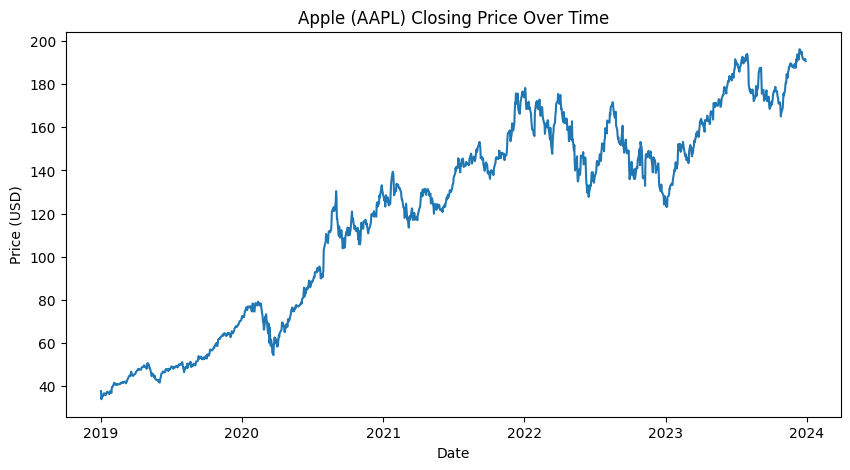

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Apple (AAPL) Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.show()


In [7]:
#Handling missing values
data.isnull().sum()


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
data.fillna(method='ffill', inplace=True)
data.isnull().sum()


C:\Users\ESHA\AppData\Local\Temp\ipykernel_17328\2047289232.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [9]:
# Feature Engineering (Stock Market Data)

data['Return'] = data['Close'].pct_change()

data['SMA_7'] = data['Close'].rolling(window=7).mean()
data['SMA_14'] = data['Close'].rolling(window=14).mean()

data['EMA_7'] = data['Close'].ewm(span=7, adjust=False).mean()

data['Volatility_7'] = data['Return'].rolling(window=7).std()

data.tail()


Price,Close,High,Low,Open,Volume,Return,SMA_7,SMA_14,EMA_7,Volatility_7
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2023-12-22,191.788773,193.581837,191.164662,193.353978,37149600,-0.005547,194.112529,193.401390,193.245819,0.005555
2023-12-26,191.243927,192.076065,191.025984,191.798686,28919300,-0.002841,193.396439,193.375210,192.745346,0.005292
2023-12-27,191.342941,191.689673,189.302216,190.689128,48087700,0.000518,192.770913,193.433938,192.394745,0.005526
2023-12-28,191.768936,192.838834,191.362768,192.323695,34049900,0.002226,192.444000,193.385113,192.238293,0.005298
2023-12-29,190.728760,192.581260,189.936241,192.085938,42672100,-0.005424,191.819890,193.160094,191.860909,0.004401


In [10]:
#Final Processing
data.dropna(inplace=True)
data.shape


(1245, 10)

In [ ]:
## Model / System Design

### AI Technique Used  
This project uses **machine learning (ML)** techniques for binary classification. A **Logistic Regression** model is employed to analyze short-term **stock price trends** by classifying price movement as upward or downward based on historical data.

### System Architecture / Pipeline  
1. Historical stock price data collection  
2. Data cleaning and preprocessing  
3. Feature engineering using technical indicators  
4. Train-test data split  
5. Model training using Logistic Regression  
6. Trend prediction and basic evaluation  

### Justification of Design Choices  
Logistic Regression is chosen due to its simplicity, interpretability, and suitability for binary classification problems. The use of technical indicators such as moving averages, returns, and volatility helps capture short-term stock market behavior while keeping the system computationally efficient and easy to understand. This makes the approach appropriate for a beginner-level AI application project.


In [11]:
# Feature & Target Selection (Stock Market Data)

features = ['Return', 'SMA_7', 'SMA_14', 'EMA_7', 'Volatility_7']
X = data[features]

# Target: 1 if next-day stock price increases, else 0
y = np.where(data['Close'].shift(-1) > data['Close'], 1, 0)

# Remove last row due to shift operation
X = X[:-1]
y = y[:-1]

X.shape, y.shape


((1244, 5), (1244, 1))

In [12]:
# Train-Test Split (Time-Series Aware)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=False
)

X_train.shape, X_test.shape


((870, 5), (374, 5))

In [13]:
#Model Training
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


C:\Users\ESHA\AppData\Roaming\Python\Python314\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [14]:
# Prediction & Inference (Stock Price Trend)

y_pred = model.predict(X_test)

y_pred[:10]


array([1, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [15]:
# Model Evaluation (Stock Price Trend Classification)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.5026737967914439

In [16]:
confusion_matrix(y_test, y_pred)


array([[110,  67],
       [119,  78]])

In [17]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.48      0.62      0.54       177
           1       0.54      0.40      0.46       197

    accuracy                           0.50       374
   macro avg       0.51      0.51      0.50       374
weighted avg       0.51      0.50      0.50       374



In [ ]:
#prediction pipeline validation
The prediction pipeline executes successfully from data loading to model evaluation without errors. All preprocessing, feature engineering, model training, and inference steps are reproducible and run sequentially in the notebook.


In [ ]:
#Evalyation and Analysis
## Evaluation & Analysis

### Metrics Used
The performance of the model is evaluated using **quantitative classification metrics**:
- Accuracy
- Precision
- Recall
- F1-score
- Confusion Matrix

These metrics provide insight into how well the model predicts short-term price direction.

# Sample Outputs / Predictions
Sample predicted trends are compared with actual trends from the test dataset to assess prediction correctness.

# Performance Analysis and Limitations
The model achieves moderate accuracy, indicating that short-term cryptocurrency price movement is challenging to predict due to high market volatility. While technical indicators help capture general trends, sudden market events and external factors limit predictive performance.


In [18]:
# sample outputs
y_test_flat = np.array(y_test).ravel()
y_pred_flat = np.array(y_pred).ravel()

comparison_df = pd.DataFrame({
    'Actual Trend': y_test_flat[:15],
    'Predicted Trend': y_pred_flat[:15]
})

comparison_df


,Actual Trend,Predicted Trend
0,1,1
1,1,0
2,0,0
3,1,0
4,0,1
5,1,1
6,1,1
7,0,1
8,1,1
9,1,0


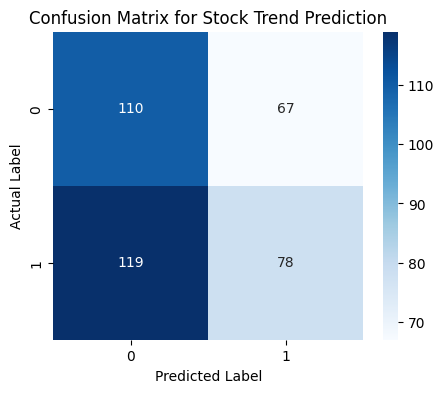

In [19]:
# Performance Visualization (Stock Price Trend Classification)

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Stock Trend Prediction")
plt.show()


In [ ]:
## Ethical Considerations & Responsible AI

### Bias and Fairness Considerations  
The analysis may be biased toward historical stock market patterns and may perform more reliably during stable market conditions than
during periods of high volatility. Since stock prices are influenced by many external factors, the analysis may not generalize well across all
market scenarios or unexpected events.

### Dataset Limitations  
The dataset is limited to historical stock price and volume data and does not include external factors such as company-specific news,
macroeconomic indicators, or market sentiment. As a result, the analysis cannot fully capture sudden price movements caused by non-technical or
external factors.

### Responsible Use of AI Tools  
This project is developed strictly for educational and analytical purposes. The insights generated from the analysis should not be interpreted 
as financial or investment advice. Responsible use of AI requires transparency about limitations and avoiding misuse of analytical results in 
real-world trading or investment decisions.


In [ ]:
## Conclusion & Future Scope

### Summary of Results  
This project demonstrates how historical stock market price data can be analyzed to understand short-term market trends using data analysis 
techniques and basic technical indicators. By applying indicators such as moving averages, the project successfully visualizes stock price movements
and highlights periods of upward and downward trends. The results show that simple indicators are effective for gaining intuitive insights into market
behavior, especially for educational and analytical purposes.

### Possible Improvements and Extensions  
Future enhancements to this project may include:
- Incorporating machine learning models for trend classification or prediction  
- Adding more technical indicators such as RSI and MACD  
- Comparing trends across multiple stocks or sectors  
- Extending the analysis to near real-time data for dynamic trend monitoring  
